## [Data Reclassification](https://autogis-site.readthedocs.io/en/latest/notebooks/L4/reclassify.html)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
json_file = 'data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson'
acc = gpd.read_file(json_file, driver='GeoJSON')
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


In [5]:
acc = acc.loc[acc['pt_r_tt'] >= 0]

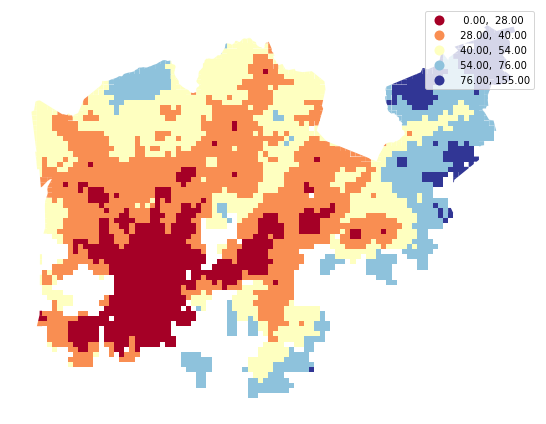

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
acc.plot(ax=ax, column='pt_r_tt', scheme='Natural_Breaks', cmap='RdYlBu', legend=True)
plt.axis('off')
plt.tight_layout()

- classifying walking data

In [14]:
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


(378807.193, 404692.833, 6666842.746945139, 6686802.315097851)

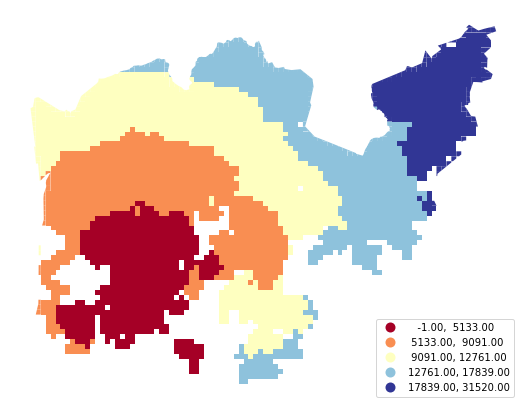

In [18]:
fig, ax = plt.subplots(figsize=(8, 7))
acc.plot(ax=ax, column='walk_d', scheme='Natural_Breaks', cmap='RdYlBu', legend=True,
        legend_kwds={'loc': 'lower right'})
plt.tight_layout()
plt.axis('off')

In [19]:
import mapclassify

In [20]:
mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)

NaturalBreaks           

    Interval       Count
------------------------
[  0.00,  19.00] |   196
( 19.00,  29.00] |   506
( 29.00,  37.00] |   869
( 37.00,  45.00] |   914
( 45.00,  54.00] |   512
( 54.00,  67.00] |   439
( 67.00,  82.00] |   191
( 82.00, 102.00] |   160
(102.00, 155.00] |    20

In [22]:
mapclassify.Quantiles(y=acc['pt_r_tt'])

Quantiles               

    Interval       Count
------------------------
[  0.00,  30.00] |   792
( 30.00,  37.00] |   779
( 37.00,  44.00] |   821
( 44.00,  56.00] |   685
( 56.00, 155.00] |   730

In [23]:
classifier = mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)
classifier.bins

array([ 19.,  28.,  36.,  43.,  52.,  64.,  78.,  95., 155.])

In [25]:
classifications = acc[['pt_r_tt']].apply(classifier)
classifications.head()

,pt_r_tt
0,8
1,7
2,8
3,8
4,8


In [27]:
acc['nb_pt_r_tt'] = acc[['pt_r_tt']].apply(classifier)
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,nb_pt_r_tt
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6...",8
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6...",7
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6...",8
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6...",8
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6...",8


In [29]:
acc[['pt_r_tt', 'nb_pt_r_tt']].head()

,pt_r_tt,nb_pt_r_tt
0,99,8
1,93,7
2,146,8
3,155,8
4,99,8


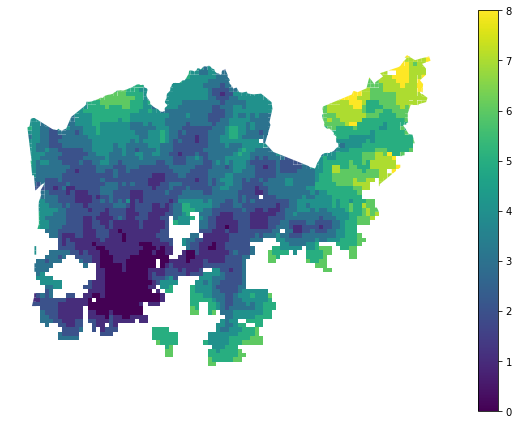

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
acc.plot(ax=ax, column='nb_pt_r_tt', linewidth=0, legend=True)
plt.axis('off')
plt.tight_layout()

<AxesSubplot:ylabel='Frequency'>

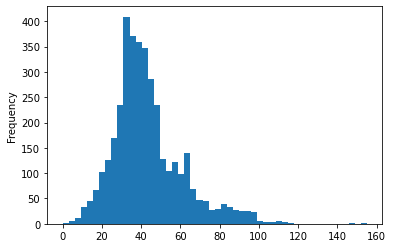

In [32]:
acc['pt_r_tt'].plot.hist(bins=50)

#### add threshold marks to histogram

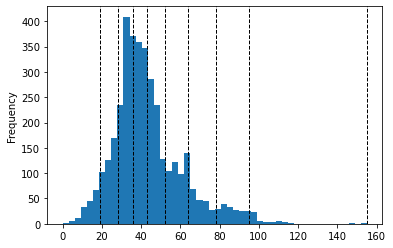

In [34]:
acc['pt_r_tt'].plot.hist(bins=50)
for v in classifier.bins:
    plt.axvline(v, linewidth=1, color='k', linestyle='dashed')

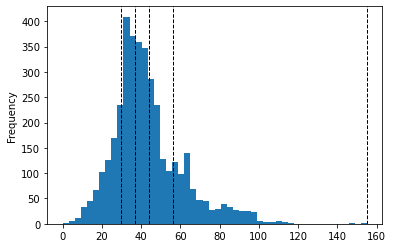

In [37]:
classifier = mapclassify.Quantiles(acc['pt_r_tt'])
acc['pt_r_tt'].plot.hist(bins=50)
for v in classifier.bins:
    plt.axvline(v, linewidth=1, color='k', linestyle='dashed')

In [38]:
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,nb_pt_r_tt
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6...",8
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6...",7
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6...",8
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6...",8
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6...",8


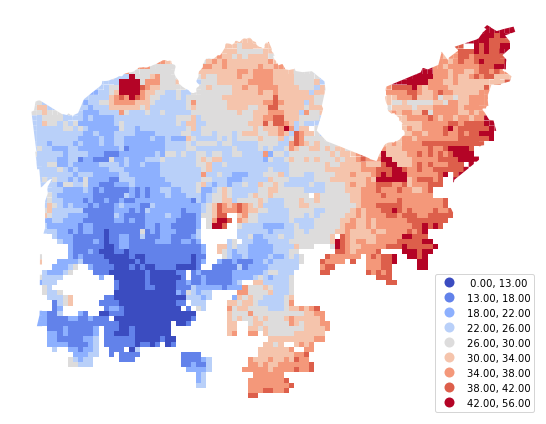

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
acc.plot(ax=ax, column='car_r_t', scheme='Natural_Breaks', k=9, cmap='coolwarm',
         legend=True, linewidth=0, legend_kwds={'loc': 'lower right'})
plt.axis('off')
plt.tight_layout()

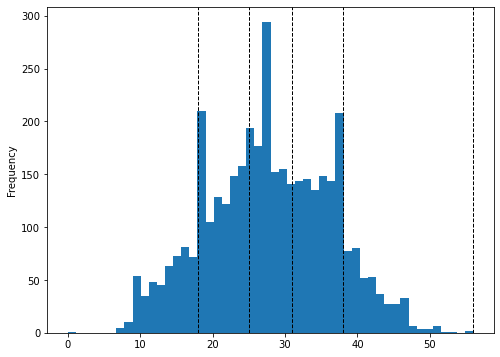

In [42]:
classifier = mapclassify.NaturalBreaks(y=acc['car_r_t'])
acc['nb_car_r_t'] = acc[['car_r_t']].apply(classifier)

fig, ax = plt.subplots(figsize=(8, 6))
acc['car_r_t'].plot.hist(bins=50)
for v in classifier.bins:
    plt.axvline(v, linewidth=1, linestyle='dashed', color='k')

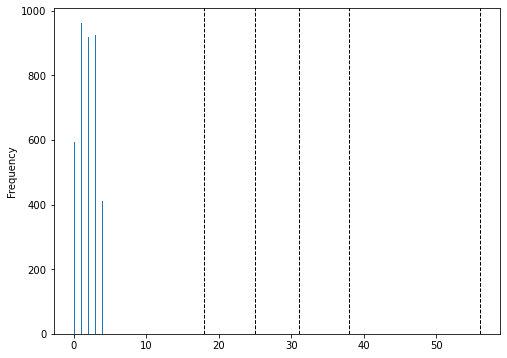

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
acc['nb_car_r_t'].plot.hist(bins=50)
for v in classifier.bins:
    plt.axvline(v, linewidth=1, linestyle='dashed', color='k')

(378807.193, 404692.833, 6666842.746945139, 6686802.315097851)

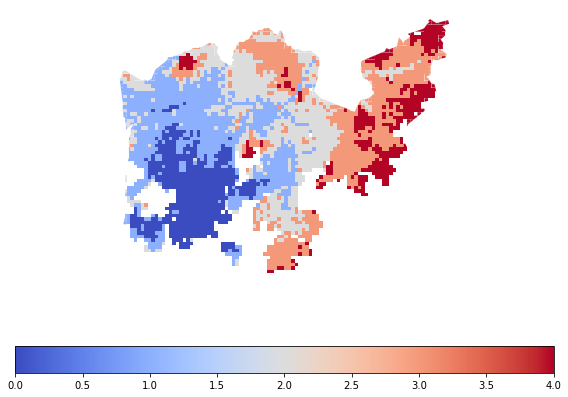

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
acc.plot(column='nb_car_r_t', ax=ax, linewidth=0, legend=True, cmap='coolwarm',
        legend_kwds={'orientation': 'horizontal'})
plt.tight_layout()
plt.axis('off')

### creating a custom classifier

In [49]:
# custom classifier to classify data based on given threshold
def custom_classifier(row, src_col1, src_col2, threshold1, threshold2, output_col):
    """Custom classirifer that can be applied on each row of a pandas dataframe (axis=1).
    
    This function classifies data based on values in two source columns and stores the output value in the output column.
    Output values is 1 if the value in src_col1 is LOWER than the threshold1 value AND the value in src_col2 is HIGHER than the threshold2 value. 
    In all other cases, output value is 0.
    
    Args:
        row: one row of data
        src_col1: source column name associated with threshold1
        src_col2: source column name associated with threshold2
        threshold1: upper threshold value for src_col1
        threshold2: lower threshold value for src_col2
        output_col: output column name

    Returns:
        updated row of data.
    """

    # If condition is true, assign 1 into output column
    if row[src_col1] < threshold1 and row[src_col2] > threshold2:
        row[output_col] = 1
    
    # Else, assign 1 into output column
    else:
        row[output_col] = 0

    # Return the updated row
    return row

In [51]:
acc['suitable_area'] = None

# apply custom classifier to data
acc = acc.apply(custom_classifier,
               src_col1='pt_r_tt',
               src_col2='walk_d',
               threshold1=20,
               threshold2=4000,
               output_col='suitable_area',
               axis=1)

In [52]:
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,nb_pt_r_tt,nb_car_r_t,suitable_area
0,29476,41,29483,46,5876274,29990,76,95,24984,77,...,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6...",8,4,0
1,29456,41,29462,46,5876275,29866,74,95,24860,75,...,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6...",7,4,0
2,36772,50,36778,56,5876278,33541,116,137,44265,130,...,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6...",8,4,0
3,36898,49,36904,56,5876279,33720,119,141,44444,132,...,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6...",8,4,0
4,29411,40,29418,44,5878128,29944,75,95,24938,76,...,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6...",8,4,0


In [53]:
acc['suitable_area'].value_counts()

0    3798
1       9
Name: suitable_area, dtype: int64

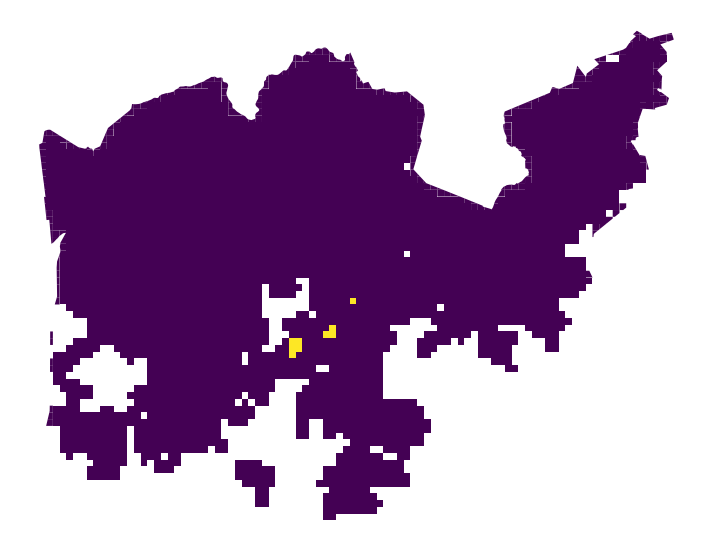

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
acc.plot(ax=ax, column='suitable_area', linewidth=0)
plt.axis('off')
plt.tight_layout()